In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

import pandas as pd

%config InlineBackend.figure_format = "retina"
%matplotlib inline

In [2]:
data = pd.read_csv("EIG.txt", delimiter="\s+", header=0)

y = data["recorded-EIG121"].values
y = y[~np.isnan(y)]
y = np.log(y)

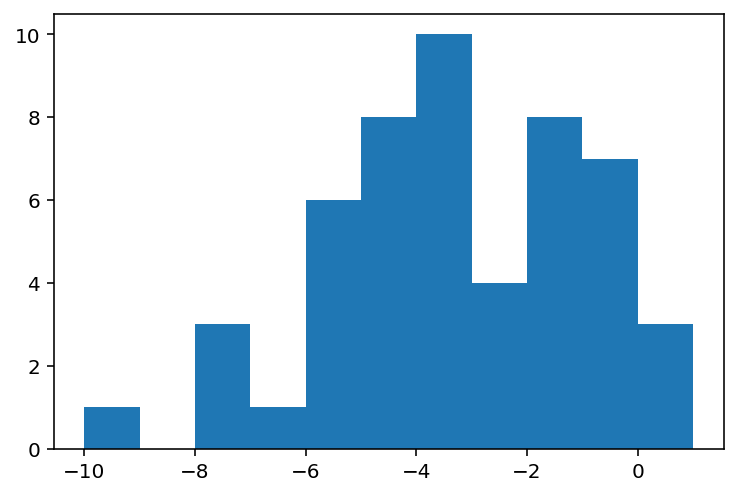

In [3]:
_ = plt.hist(y, bins=11, range=(-10, 1))

In [4]:
rng = np.random.RandomState(seed=34)
NUM_ITER = 100

M = 15
m = -5; B = 3
sigma_sq = 3 # known variance

x_grid = np.linspace(start=-10, stop=1, num=1001)

In [5]:
G0 = lambda: rng.normal(loc=-5, scale=np.sqrt(B))

def h(yi):
    return norm.pdf(yi, loc=m, scale=np.sqrt(B + sigma_sq))

def sample_s(yi, y_minus, s_minus, G0, rng=rng):
    
    global prob
    prob = []
    
    for urn_id in np.unique(s_minus):
        nj_minus = np.sum(s_minus == urn_id)
        Vj_minus = 1/(1/B + nj_minus/sigma_sq)
        mj_minus = Vj_minus*(m/B + np.sum(y_minus[s_minus == urn_id])/sigma_sq)

        prob = np.append(
            prob, 
            nj_minus*norm.pdf(yi, loc=mj_minus, scale=np.sqrt(Vj_minus + sigma_sq)),
        )
    
    prob = np.append(prob, M*h(yi)) # compute hyi
    prob = prob/prob.sum()

    s_draw = rng.choice(range(len(prob)), p=prob)
    
    assert len(theta_star_minus) == len(np.unique(s_minus))
    
    if s_draw == len(theta_star_minus):
        return G0()
    
    else:
        return theta_star_minus[s_draw]
    

def sample_theta_star(yj_star_minus, G0=G0, rng=rng):
    """
    yj_star: array of observations assigned to urn j
    """
    nj_minus = len(yj_star_minus)
    
    if nj_minus == 0:
        return G0()
    
    return rng.normal( 
        loc=(B*np.sum(yj_star_minus) + sigma_sq*m)/(nj_minus*B + sigma_sq), 
        scale=np.sqrt((B*sigma_sq)/(nj_minus*B + sigma_sq)),
    )


def sample_density(grid, thetas):
    f = []
    for x in grid:
        f.append(norm.pdf(x, loc=thetas, scale=np.sqrt(sigma_sq)).sum())
        
    return f

In [6]:
for f in f_acc:
    plt.plot(x_grid, f, c="gray")

NameError: name 'f_acc' is not defined